# Exploratory Data Analysis (EDA) - Initial exploration

* Fecha de creacion: 2024/04/08

* Ultima **fecha de actualizacion** de este documento: 2024/04/24 - por Soraya Alvarez Codesal

* **Objetivo general del proyecto**: 

El objetivo principal de este proyecto es desarrollar un motor de recomendación de vinos que se aprovecha de las notas de cata y maridaje. Esta innovación se centra en la capacidad del cliente para personalizar las recomendaciones, permitiéndole ajustar la importancia relativa del precio y el rating de los vinos. Este enfoque único asegura una experiencia de selección de vinos completamente adaptada a las preferencias individuales del usuario.

Al basar la selección del vino en las notas de cata y maridaje, garantizamos que el resultado de la recomendación no se limite a un solo tipo de vino. Por ejemplo, al solicitar una recomendación de un rosado, el sistema podría incluir tanto tintos suaves como blancos o espumosos. Este enfoque desafía los prejuicios y las ideas preconcebidas sobre ciertos tipos de vinos, ofreciendo resultados verdaderamente sorprendentes para el usuario o cliente.


* **El objetivo de este documento**: 

Este documento proporciona una introducción a la sección de Exploratory Data Analysis y establece el contexto para el análisis de datos que seguirá.


In [1]:
# Cargamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

## 1. Cargamos los datos

In [81]:
# Cargamos los datos
data = pd.read_csv('df_vinos_modelos.csv')
data

,titulo,link,precio,rating,bodega,tipo,grado,anada,variedad,origen,...,clima,suelo,envejecimiento,tipo2,variedad2,cata,fisico,descripcion,descripcion2,fisico2
0,sierra cantabria magico 2016,https://bodeboca.com/vino/sierra-cantabria-mag...,594.00,5.0,bodegas vinedos-sierra-cantabria,tinto,14.5,2016.0,"65% tempranillo, 20% garnacha, 4.4% calagraño,...",rioja,...,continental con influencia mediterranea,arcillo-limoso / arcillo-arenoso,crianza en barricas nuevas de roble frances.,tinto,"tempranillo, garnacha, calagraño, turrunte...",rojo cereza / reflejos violaceos / capa media-...,continental con influencia mediterranea arcill...,rojo cereza / reflejos violaceos / capa media-...,rojo cereza reflejos violaceos capa medium alt...,continental influencia mediterranea arcillo li...
1,viña el pison 2019,https://bodeboca.com/vino/vina-el-pison-2019,375.00,5.0,bodegas artadi-vinedos-vinos,tinto,14.5,2019.0,100% tempranillo,vino de españa,...,atlantico con influencia continental,arcillo-calcareo,crianza de 8 meses en barricas de roble.,tinto,tempranillo,"bien definidos, nitidos y transparentes cromat...",atlantico con influencia continental arcillo-c...,"bien definidos, nitidos y transparentes cromat...",bien definidos nitidos transparentes cromatica...,atlantico influencia continental arcillo calcareo
2,artadi la poza de ballesteros 2020,https://bodeboca.com/vino/artadi-la-poza-balle...,105.00,4.7,bodegas artadi-vinedos-vinos,tinto,14.5,2020.0,100% tempranillo,vino de españa,...,2020 se inicio con una primavera lluviosa y fr...,arcillo-calcareo con presencia de limo. profun...,NaN,tinto,tempranillo,"colo rojo picota profundo, capa alta, con nota...",2020 se inicio con una primavera lluviosa y fr...,"colo rojo picota profundo, capa alta, con nota...",colo rojo picota profundo capa alta notas viol...,inicio primavera lluviosa fresca creando unas ...
3,vermut de categorila,https://bodeboca.com/vino/vermut-categorila,7.25,5.0,bodegas bisila,red vermouth,14.0,NaN,"airen, malvasi­a",españa,...,atlantico,albariza,NaN,vermouth,"airen, malvasia","color caoba. aroma a hierbas secas, balsamico,...",atlantico albariza,"color caoba. aroma a hierbas secas, balsamico,...",color caoba aroma hierbas secas balsamico espe...,atlantico albariza
4,el puntido 2020 magnum,https://bodeboca.com/vino/el-puntido-2020-magnum,88.90,5.0,bodegas vinedos-paganos,tinto,14.0,2020.0,100% tempranillo,rioja,...,2020 inicia el ciclo anual con abundantes lluv...,franco-arcilloso por su textura y arcillo-calc...,crianza de 15 meses en barrica nueva de roble ...,tinto,tempranillo,"color rojo picota, con ribete dorado. limpio y...",2020 inicia el ciclo anual con abundantes lluv...,"color rojo picota, con ribete dorado. limpio y...",color rojo picota ribete dorado limpio brillan...,inicia ciclo anual abundantes lluvias noviembr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4787,tobia seleccion de autor blanco 2021,https://bodeboca.com/vino/tobia-seleccion-auto...,14.20,NaN,bodegas bodegas-tobia,blanco,13.5,2021.0,"50% chardonnay, 50% tempranillo blanco",rioja,...,atlantico.,albariza.,crianza de 7 meses sobre li­as en las mismas b...,blanco,"chardonnay, tempranillo blanco",color dorado intenso con reflejos verdosos. in...,atlantico. albariza.,color dorado intenso con reflejos verdosos. in...,color dorado intenso reflejos verdosos intensa...,atlantico albariza
4788,viña magna 14 meses 2020 magnum,https://bodeboca.com/vino/vina-magna-14-meses-...,52.50,4.8,bodegas dominio-basconcillos,tinto,14.5,2020.0,"90% tinta del pai­s, 10% cabernet sauvignon",ribera del duero,...,continental.,arcilloso-calcareo y franco-arenoso.,crianza de 14 meses en barrica nueva de roble ...,tinto,"tinta del pais, cabernet sauvignon",limpio y brillante. exhibe un intenso color ro...,continental. arcilloso-calcareo y franco-arenoso.,limpio y brillante. exhibe un intenso color ro...,limpio brillante exhibe intenso color rojo gra...,continental arcilloso calcareo fr

In [82]:
# Calcular el porcentaje de NaN por cada columna - en el dataframe raw despues de meter datos a mano de otras paginas webs
porcentaje_nans = (data.isna().mean() * 100).round(2)

# Imprimir los resultados
print("Porcentaje de NaN por cada columna:")
print(porcentaje_nans)

Porcentaje de NaN por cada columna:
titulo             0.00
link               0.00
precio             0.00
rating            30.05
bodega             0.33
tipo               0.00
grado              0.00
anada              9.64
variedad           0.63
origen             0.00
vista              9.66
nariz              0.52
boca               1.25
temp_servir        3.19
maridaje           0.00
clima              0.02
suelo              0.56
envejecimiento    16.55
tipo2              0.00
variedad2          0.63
cata               0.00
fisico             0.56
descripcion        0.00
descripcion2       0.00
fisico2            0.56
dtype: float64


## 2. Exploratory Data Anlysis (EDA)

### 2.1 Tipo de datos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titulo          4792 non-null   object 
 1   link            4792 non-null   object 
 2   precio          4792 non-null   float64
 3   rating          3352 non-null   float64
 4   bodega          4776 non-null   object 
 5   tipo            4792 non-null   object 
 6   grado           4792 non-null   float64
 7   anada           4330 non-null   float64
 8   variedad        4762 non-null   object 
 9   origen          4792 non-null   object 
 10  vista           4329 non-null   object 
 11  nariz           4767 non-null   object 
 12  boca            4732 non-null   object 
 13  temp_servir     4639 non-null   float64
 14  maridaje        4792 non-null   object 
 15  clima           4791 non-null   object 
 16  suelo           4765 non-null   object 
 17  envejecimiento  3999 non-null   o

In [53]:
df_vinos.columns

Index(['titulo', 'link', 'precio', 'rating', 'bodega', 'tipo', 'grado',
       'anada', 'variedad', 'origen', 'vista', 'nariz', 'boca', 'temp_servir ',
       'maridaje', 'clima', 'suelo', 'envejecimiento'],
      dtype='object')

### 2.2. Revisamos columnas 

Revisamos las columnas y convertimos a numericas las necesarias


#### 2.2.1 Columnas numericas
Revisamos las numericas `precio`, `rating`, `grado` y `Temperatura de servicio`

##### a. precios de vinos

- El precio minimo de los vinos es de: **2800 euros**
- El precio maximo de los vinos es de: **4.45 euros**

In [9]:
max(data.precio)

2799.0

In [10]:
min(data.precio)

4.45

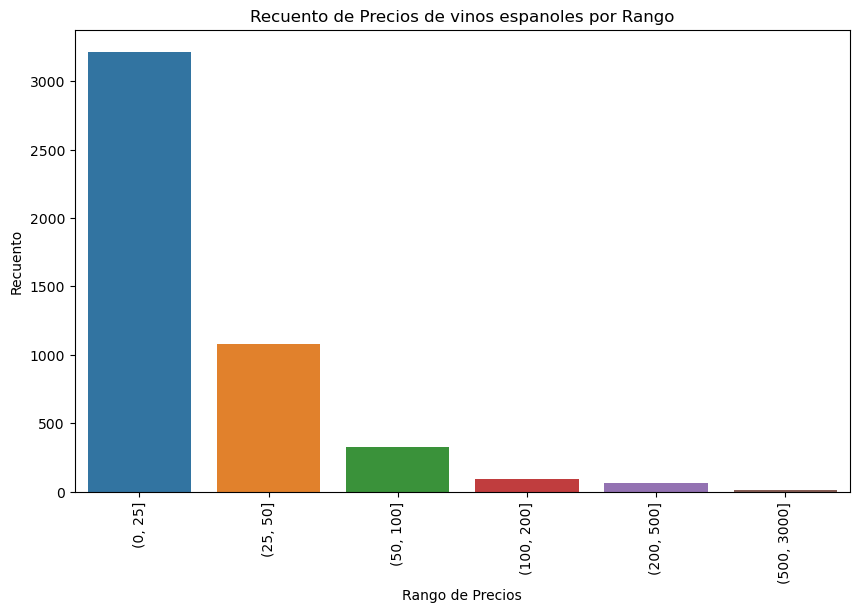

In [4]:
# Crear rangos de precios
rangos_precios = pd.cut(data['precio'], bins=[0, 25, 50, 100, 200, 500, 3000])

# Graficar el recuento de precios por rango
plt.figure(figsize=(10, 6))
sns.countplot(x=rangos_precios)
plt.xticks(rotation=90)
plt.xlabel('Rango de Precios')
plt.ylabel('Recuento')
plt.title('Recuento de Precios de vinos espanoles por Rango')
plt.show()


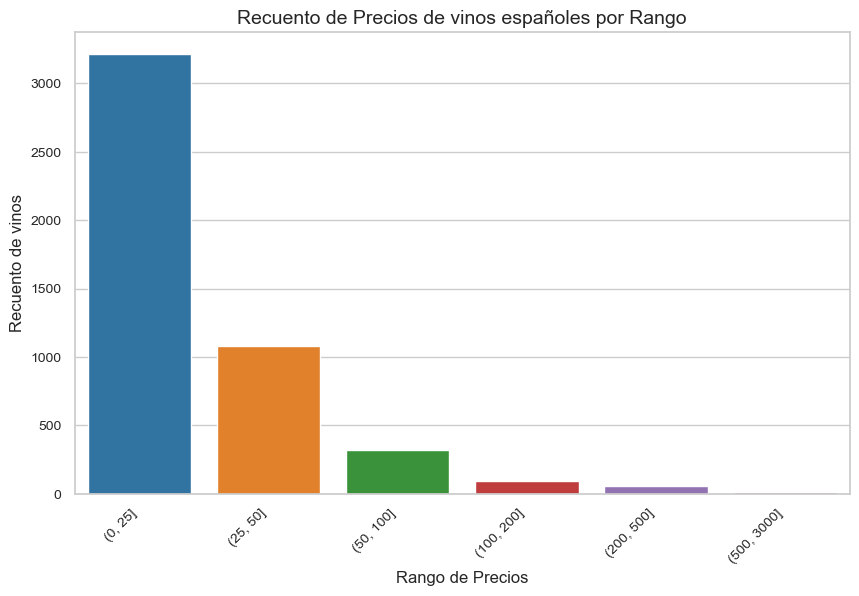

In [14]:
# Crear rangos de precios
rangos_precios = pd.cut(data['precio'], bins=[0, 25, 50, 100, 200, 500, 3000])

# Definir colores personalizados para los rangos de precios
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Graficar el recuento de precios por rango con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x=rangos_precios, palette=colores, order=rangos_precios.cat.categories)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajustar la rotación y el tamaño de las etiquetas del eje x
plt.yticks(fontsize=10)  # Ajustar el tamaño de las etiquetas del eje y
plt.xlabel('Rango de Precios', fontsize=12)
plt.ylabel('Recuento de vinos', fontsize=12)
plt.title('Recuento de Precios de vinos españoles por Rango', fontsize=14)
plt.show()


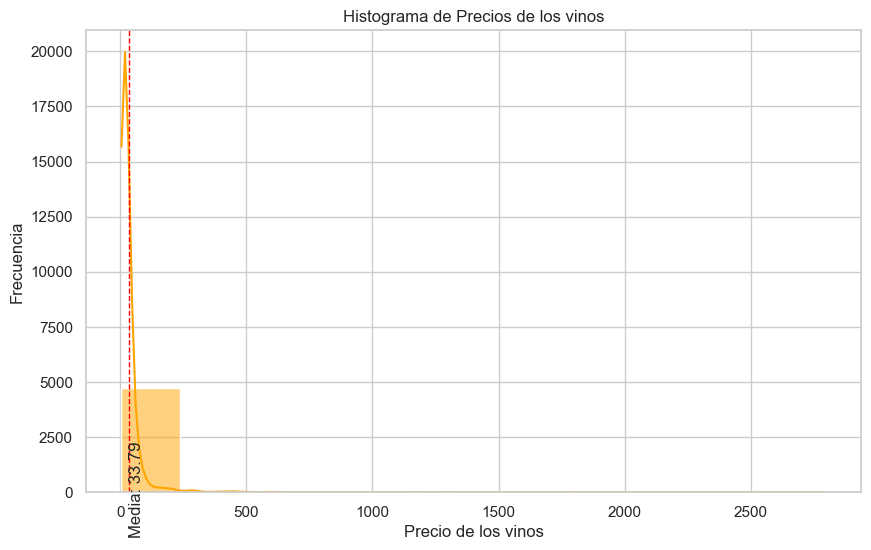

In [5]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el histograma con seaborn y especificar el color
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.histplot(data["precio"], bins=12, kde=True, color='orange')

# Calcular la media de los datos
media = np.mean(data["precio"])

# Agregar la línea vertical para la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Agregar etiquetas y título
plt.xlabel("Precio de los vinos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Precios de los vinos")

# Agregar texto para la media
plt.text(media + 0.02, 100, f'Media: {media:.2f}', rotation=90, verticalalignment='center')

# Mostrar el gráfico
plt.show()



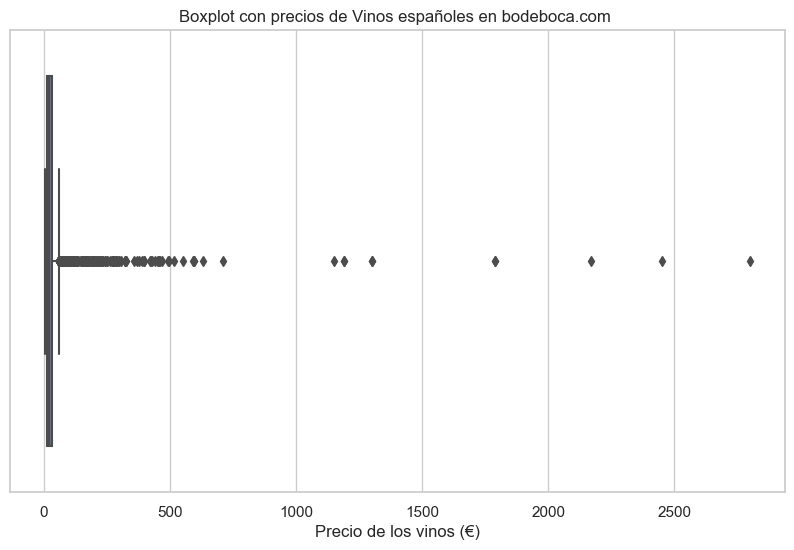

In [12]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el boxplot con seaborn
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.boxplot(x=data["precio"])

# Agregar etiquetas y título
plt.xlabel("Precio de los vinos (€)")
plt.title("Boxplot con precios de Vinos españoles en bodeboca.com ")

# Mostrar el gráfico
plt.show()


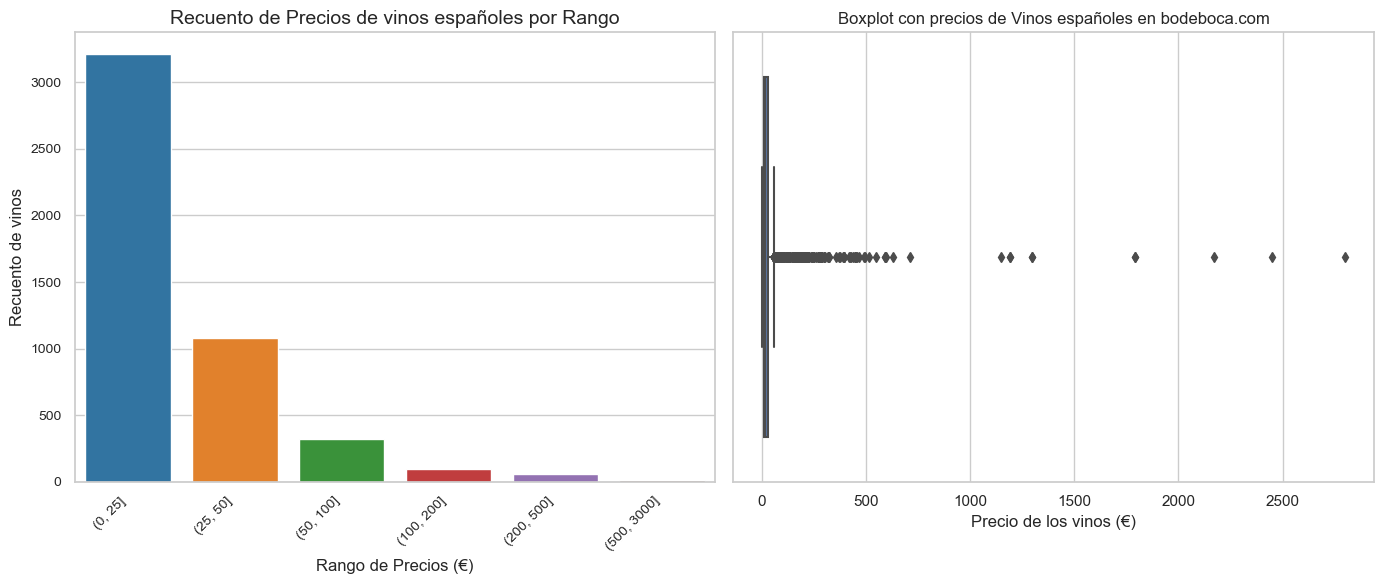

In [26]:
# juntamos los plots de precios
# Crear rangos de precios
rangos_precios = pd.cut(data['precio'], bins=[0, 25, 50, 100, 200, 500, 3000])

# Definir colores personalizados para los rangos de precios
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Graficar el recuento de precios por rango con Seaborn en el primer subplot
sns.countplot(x=rangos_precios, palette=colores, order=rangos_precios.cat.categories, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=10)
axes[0].set_xlabel('Rango de Precios (€)', fontsize=12)
axes[0].set_ylabel('Recuento de vinos', fontsize=12)
axes[0].set_title('Recuento de Precios de vinos españoles por Rango', fontsize=14)

# Crear el boxplot con seaborn en el segundo subplot
sns.boxplot(x=data["precio"], ax=axes[1])
axes[1].set_xlabel("Precio de los vinos (€)")
axes[1].set_title("Boxplot con precios de Vinos españoles en bodeboca.com")

# Ajustar el espacio entre subplots
plt.tight_layout()

# Guardar el plot como jpg
plt.savefig('precios.jpg')

# Mostrar la figura
plt.show()





##### b. Ratings ~ puntuaciones de los vinos de 0.0 a 5.0

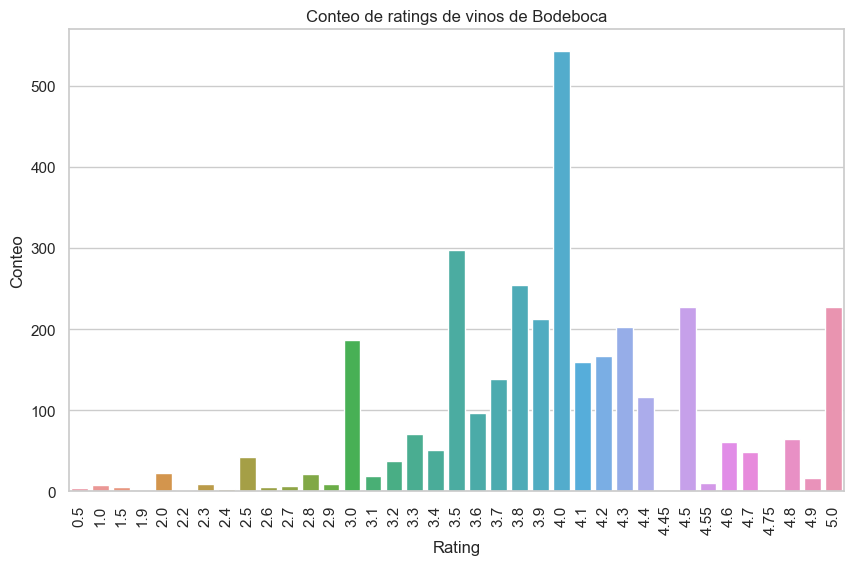

In [18]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el countplot con seaborn
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.countplot(data=data, x="rating")

# Rotar las etiquetas del eje x en 90 grados
plt.xticks(rotation=90)

# Agregar etiquetas y título
plt.xlabel("Rating")
plt.ylabel("Conteo")
plt.title("Conteo de ratings de vinos de Bodeboca")

# Mostrar el gráfico
plt.show()


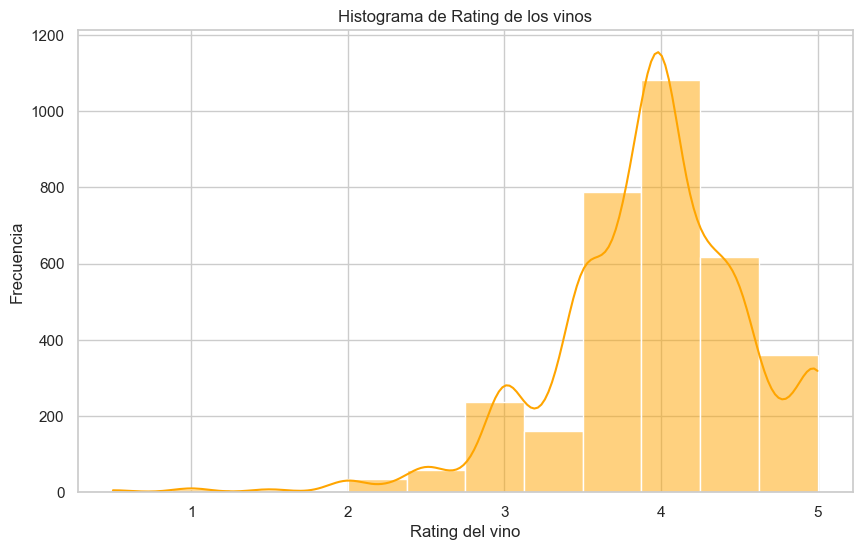

In [19]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el histograma con seaborn y especificar el color
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.histplot(data["rating"], bins=12, kde=True, color='orange')

# Agregar etiquetas y título
plt.xlabel("Rating del vino")
plt.ylabel("Frecuencia")
plt.title("Histograma de Rating de los vinos")

# Mostrar el gráfico
plt.show()


##### c. Alcohol de los vinos 

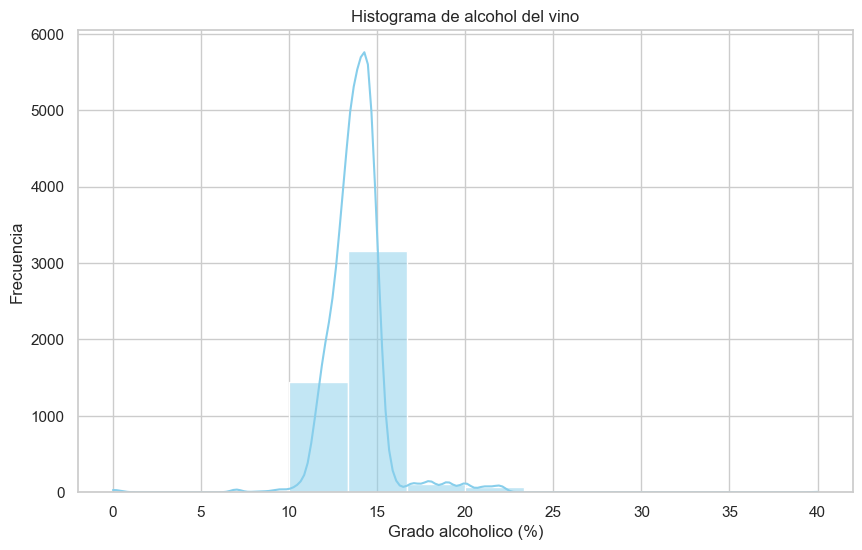

In [17]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el histograma con seaborn
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.histplot(data["grado"], bins=12, kde=True, color='skyblue')

# Agregar etiquetas y título
plt.xlabel("Grado alcoholico (%)")
plt.ylabel("Frecuencia")
plt.title("Histograma de alcohol del vino")

# Mostrar el gráfico
plt.show()


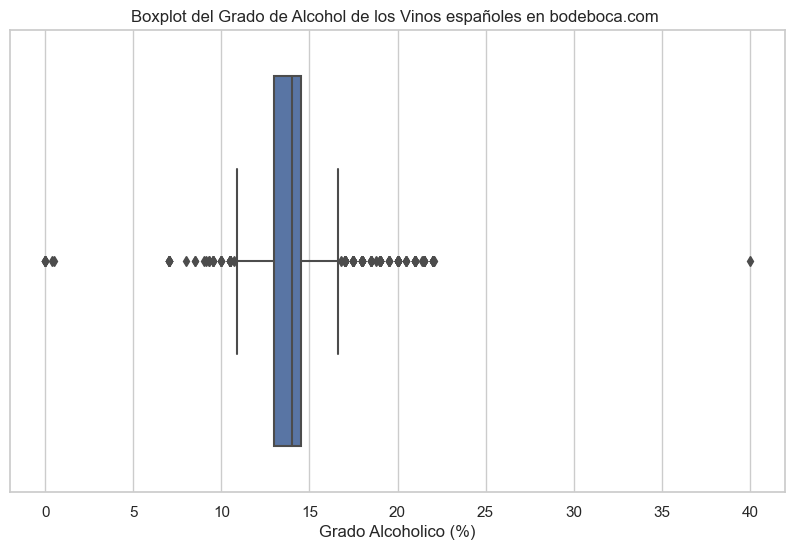

In [14]:
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el boxplot con seaborn
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.boxplot(x=data["grado"])

# Agregar etiquetas y título
plt.xlabel("Grado Alcoholico (%)")
plt.title("Boxplot del Grado de Alcohol de los Vinos españoles en bodeboca.com ")

# Mostrar el gráfico
plt.show()


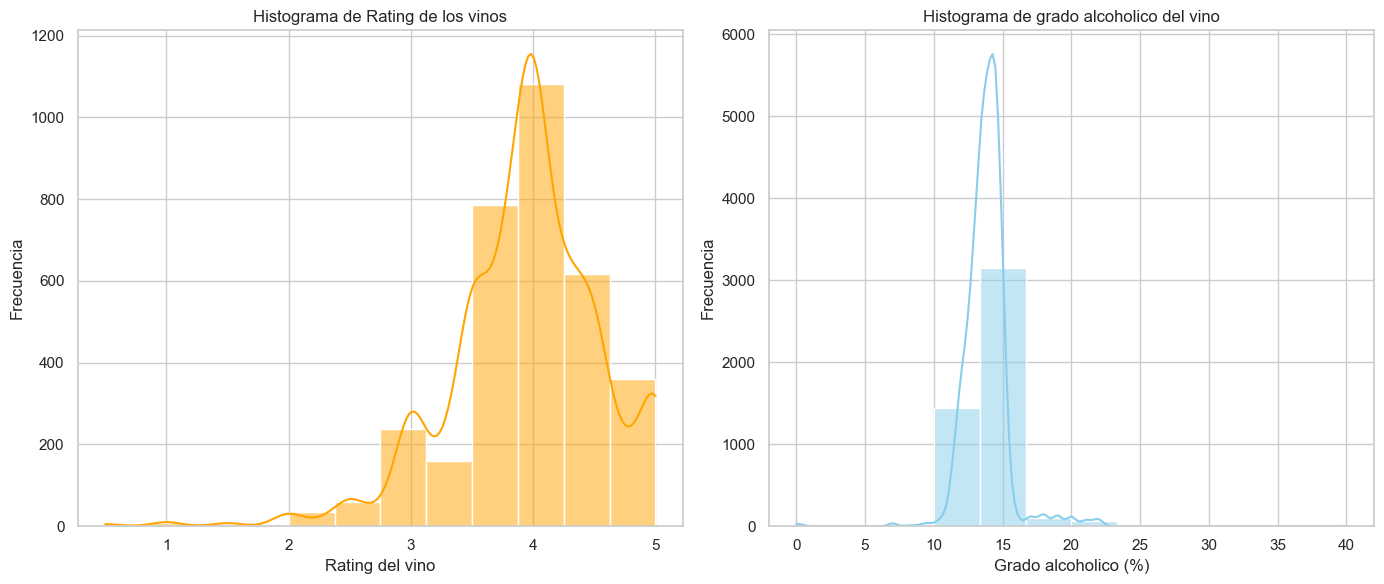

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de Rating del vino
sns.histplot(data["rating"], bins=12, kde=True, color='orange', ax=axs[0])
axs[0].set_xlabel("Rating del vino")
axs[0].set_ylabel("Frecuencia")
axs[0].set_title("Histograma de Rating de los vinos")

# Histograma de Grado alcohólico
sns.histplot(data["grado"], bins=12, kde=True, color='skyblue', ax=axs[1])
axs[1].set_xlabel("Grado alcoholico (%)")
axs[1].set_ylabel("Frecuencia")
axs[1].set_title("Histograma de grado alcoholico del vino")

# Ajustar el espaciado entre los subplots
plt.tight_layout()
# Guardar el plot como jpg
plt.savefig('rating_grados.jpg')

# Mostrar el gráfico
plt.show()



##### d. temperatura recomendada de servicio del vino

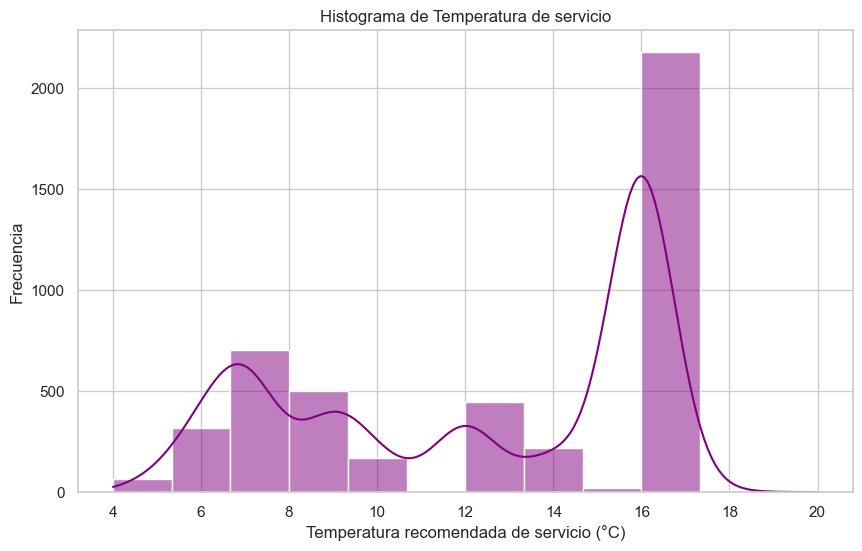

In [21]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el histograma con seaborn y especificar el color
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.histplot(data["temp_servir "], bins=12, kde=True, color='purple')

# Agregar etiquetas y título
plt.xlabel("Temperatura recomendada de servicio (°C)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Temperatura de servicio")

# Mostrar el gráfico
plt.show()


##### e. Añada de los vinos

In [34]:
# Eliminamos las filas que contienen NaN en la columna 'anada'
data2 = data.dropna(subset=['anada'])

# Convertimos la columna 'anada' a tipo integer
data2["anada"] = data2["anada"].astype(int)


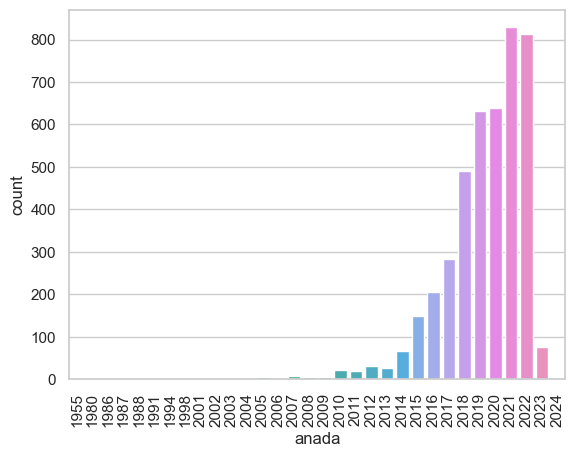

In [36]:
# grafico de los años
sns.countplot(data2,x="anada")
# Rotar las etiquetas del eje x en 90 grados
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

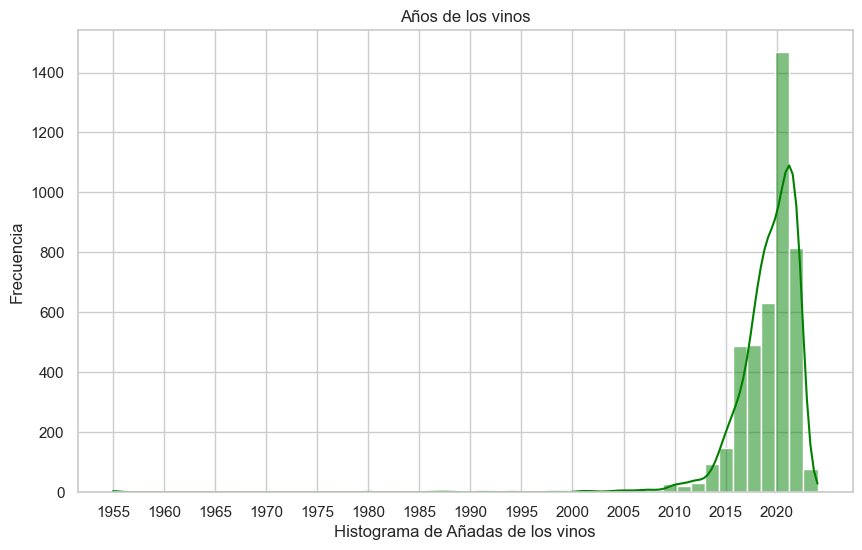

In [38]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el histograma con seaborn y especificar el color
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.histplot(data["anada"], bins=50, kde=True, color='green')

# Agregar etiquetas y título
plt.xlabel("Histograma de Añadas de los vinos")
plt.ylabel("Frecuencia")
plt.title("Años de los vinos")

# Marcar el eje x con intervalos de 5 años
plt.xticks(range(min(data2["anada"]), max(data2["anada"])+1, 5))

# Mostrar el gráfico
plt.show()


In [ ]:
# Calcular el número de valores nulos en cada columna
nulos_por_columna = data.isna().sum().sort_values()

# Mostrar el resultado
print(nulos_por_columna)

titulo               0
link                 0
precio               0
descripcion          0
tipo                 0
grado                0
cata                 0
origen               0
tipo2                0
descripcion2         0
maridaje             0
clima                1
bodega              16
nariz               25
fisico              27
suelo               27
fisico2             27
variedad2           30
variedad            30
boca                60
temp_servir        153
anada              462
vista              463
envejecimiento     793
rating            1440
dtype: int64


In [24]:
# Comprobamos duplicados
data.duplicated().sum()


0

#### 2.2.2 Columnas strings

Revisamos las numericas `bodega`, `tipo`, `variedad`, `clima`

##### a. bodegas

<Axes: xlabel='bodega'>

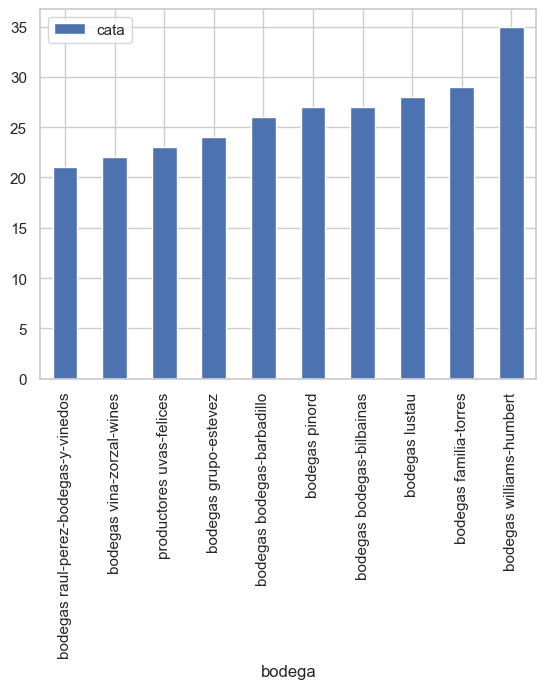

In [44]:
data.groupby('bodega').count().sort_values('cata').tail(10).plot.bar(y ='cata')

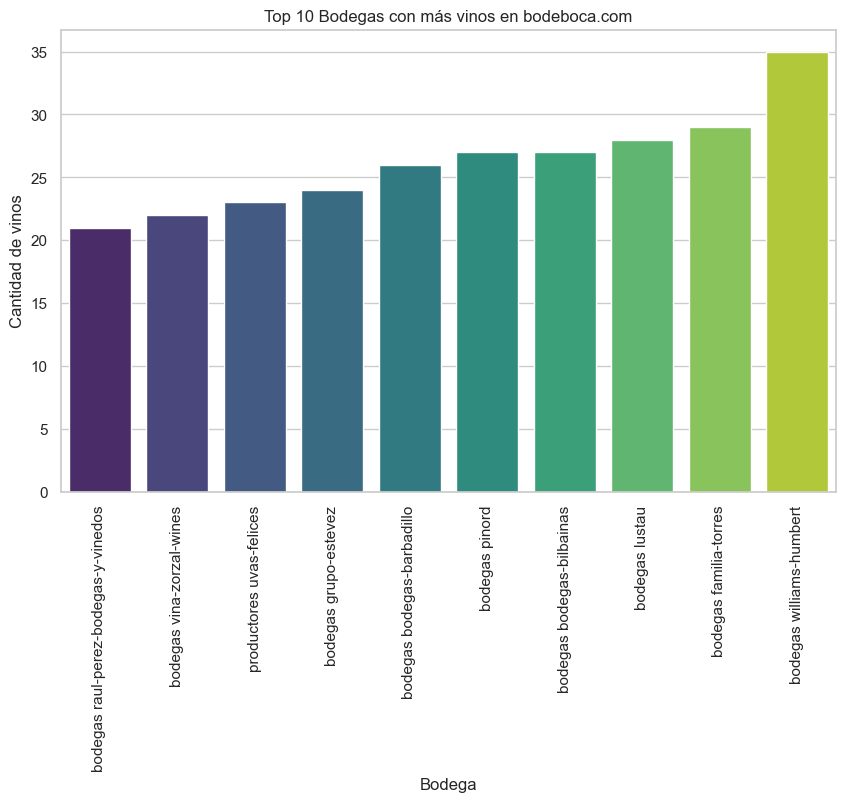

In [43]:
# Filtrar las 10 bodegas con más vinos
top_bodegas = data.groupby('bodega').count().sort_values('cata').tail(10)

# Crear el countplot con Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura si es necesario
sns.barplot(x=top_bodegas.index, y='cata', data=top_bodegas, palette='viridis')

# Rotar las etiquetas del eje x en 90 grados para una mejor visualización
plt.xticks(rotation=90)

# Agregar etiquetas y título
plt.xlabel("Bodega")
plt.ylabel("Cantidad de vinos")
plt.title("Top 10 Bodegas con más vinos en bodeboca.com")

# Mostrar el gráfico
plt.show()

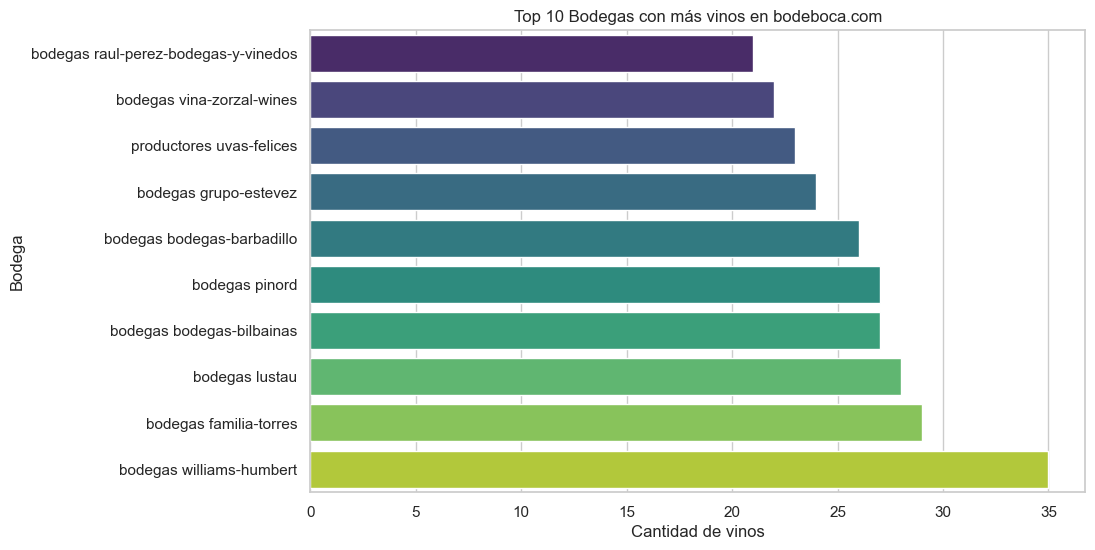

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las 10 bodegas con más vinos
top_bodegas = data.groupby('bodega').count().sort_values('cata').tail(10)

# Crear el countplot con Seaborn en horizontal
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura si es necesario
sns.barplot(y=top_bodegas.index, x='cata', data=top_bodegas, palette='viridis')


# Agregar etiquetas y título
plt.xlabel("Cantidad de vinos")
plt.ylabel("Bodega")
plt.title("Top 10 Bodegas con más vinos en bodeboca.com")

# Mostrar el gráfico
plt.show()


In [62]:
# vamos a ver el top 15 de las bodegas del dataset
data["bodega"].value_counts().head(15)

bodega
bodegas williams-humbert                 35
bodegas familia-torres                   29
bodegas lustau                           28
bodegas pinord                           27
bodegas bodegas-bilbainas                27
bodegas bodegas-barbadillo               26
bodegas grupo-estevez                    24
productores uvas-felices                 23
bodegas vina-zorzal-wines                22
bodegas raul-perez-bodegas-y-vinedos     21
bodegas gonzalez-byass                   20
bodegas artadi-vinedos-vinos             20
bodegas codorniu                         19
productores bodegas-rodriguez-y-sanzo    19
bodegas palacio-villachica               19
Name: count, dtype: int64

##### b. origen

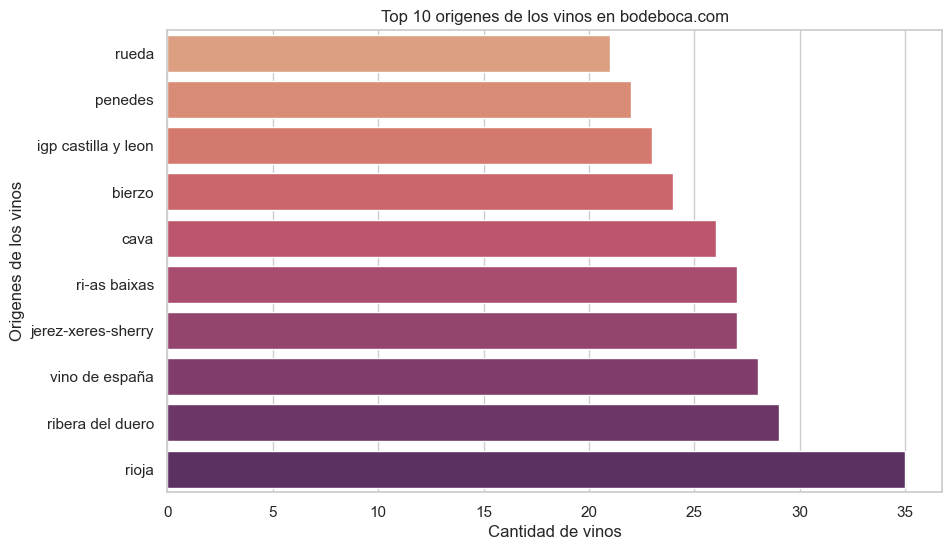

In [50]:
# Filtrar las 10 bodegas con más vinos
top_origen = data.groupby('origen').count().sort_values('cata').tail(10)

# Crear el countplot con Seaborn en horizontal
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura si es necesario
sns.barplot(y=top_origen.index, x='cata', data=top_bodegas, palette='flare')


# Agregar etiquetas y título
plt.xlabel("Cantidad de vinos")
plt.ylabel("Origenes de los vinos")
plt.title("Top 10 origenes de los vinos en bodeboca.com")

# Mostrar el gráfico
plt.show()

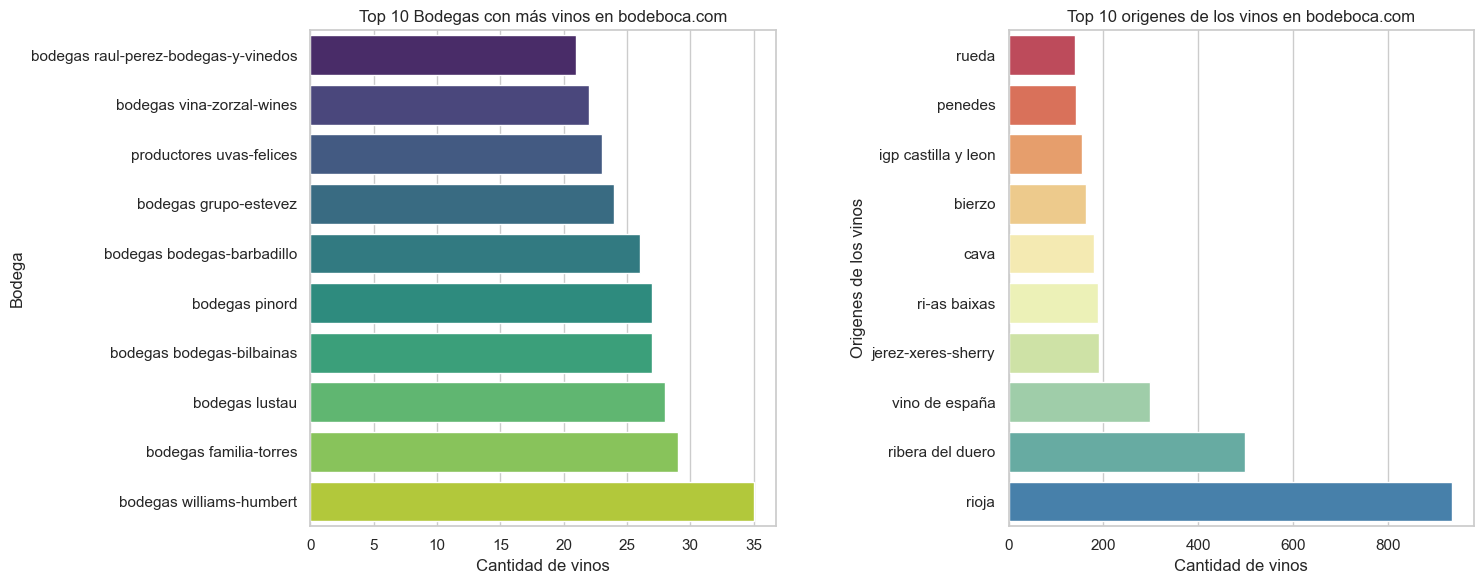

In [57]:
# Filtrar las 10 bodegas con más vinos
top_bodegas = data.groupby('bodega').count().sort_values('cata').tail(10)

# Filtrar los 10 origenes con más vinos
top_origen = data.groupby('origen').count().sort_values('cata').tail(10)

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Graficar el primer subplot
sns.barplot(y=top_bodegas.index, x='cata', data=top_bodegas, palette='viridis', ax=axs[0])
axs[0].set_ylabel("Bodega")
axs[0].set_xlabel("Cantidad de vinos")
axs[0].set_title("Top 10 Bodegas con más vinos en bodeboca.com")

# Graficar el segundo subplot
sns.barplot(y=top_origen.index, x='cata', data=top_origen, palette='Spectral', ax=axs[1])
axs[1].set_ylabel("Origenes de los vinos")
axs[1].set_xlabel("Cantidad de vinos")
axs[1].set_title("Top 10 origenes de los vinos en bodeboca.com")

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Ajustar el espaciado entre subplots
plt.subplots_adjust(wspace=0.5)  # Espacio entre subplots

# Guardar el plot como jpg
plt.savefig('bodegas_origenes.jpg')


# Mostrar la figura con los subplots
plt.show()



##### c. tipos de vino

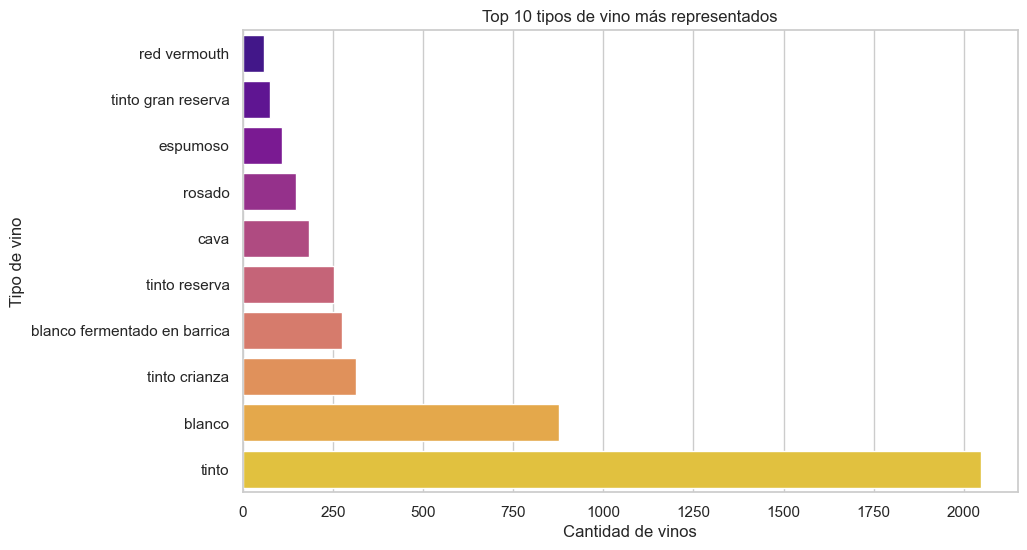

In [34]:
# Filtrar los 10 tipos de vino con más vinos en el dataframe
top_tipo = data.groupby('tipo').count().sort_values('cata').tail(10)

# Crear el countplot con Seaborn en horizontal
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura si es necesario
sns.barplot(x='cata', y=top_tipo.index, data=top_tipo, palette='plasma')

# Agregar etiquetas y título
plt.xlabel("Cantidad de vinos")
plt.ylabel("Tipo de vino")
plt.title("Top 10 tipos de vino más representados")

# Mostrar el gráfico
plt.show()


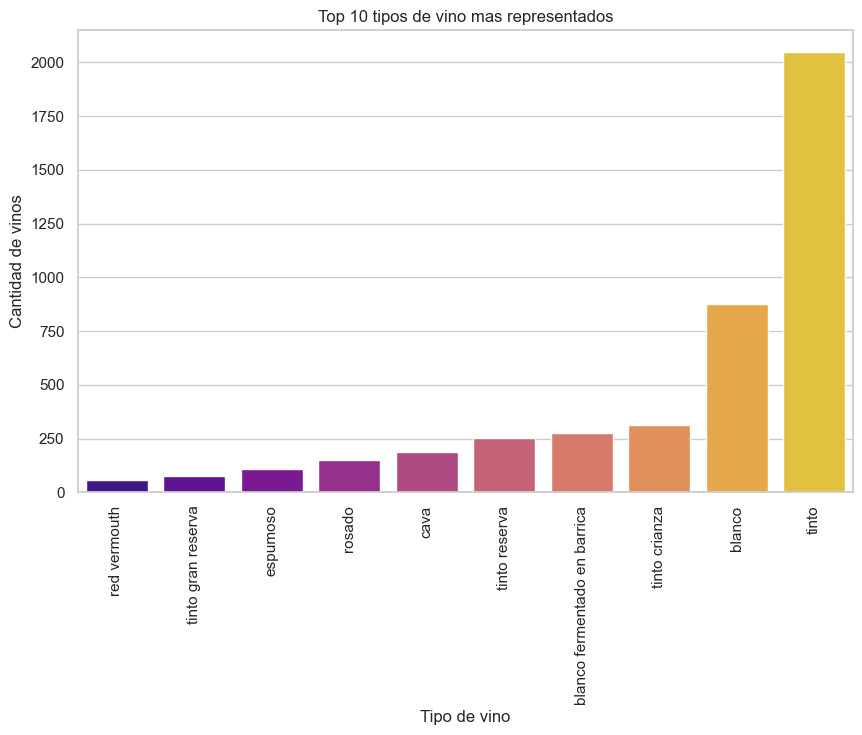

In [51]:
# Filtrar los 10 tipos de vino con más vinos en el dataframe
top_tipo = data.groupby('tipo').count().sort_values('cata').tail(10)

# Crear el countplot con Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura si es necesario
sns.barplot(x=top_tipo.index, y='cata', data=top_tipo, palette='plasma')

# Rotar las etiquetas del eje x en 90 grados para una mejor visualización
plt.xticks(rotation=90)

# Agregar etiquetas y título
plt.xlabel("Tipo de vino")
plt.ylabel("Cantidad de vinos")
plt.title("Top 10 tipos de vino mas representados")

# Mostrar el gráfico
plt.show()

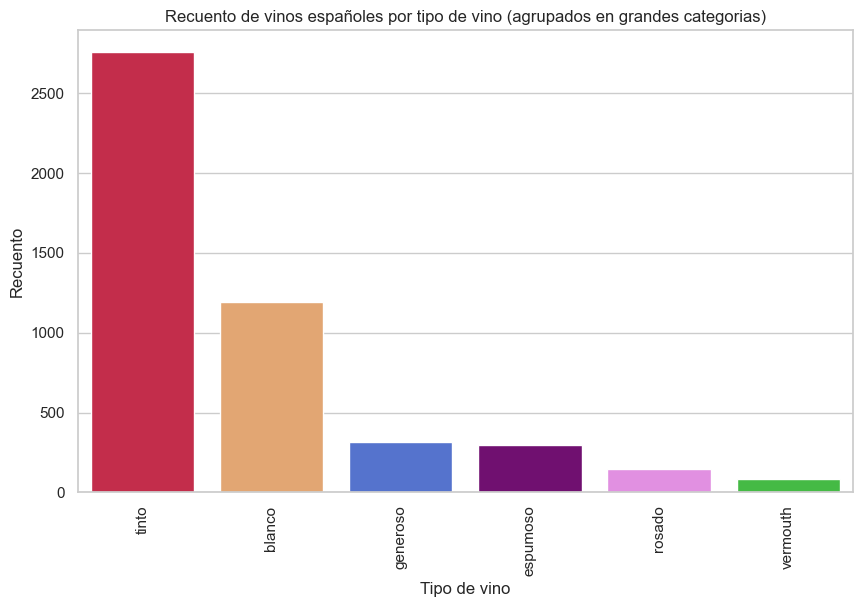

In [35]:
# Definir el mapeo de colores para los tipos de vino
color_map = {
    'tinto': 'crimson',
    'blanco': 'sandybrown',
    'espumoso': 'royalblue',
    'generoso': 'purple',
    'rosado': 'violet', 
    'vermouth': 'limegreen'
}

# Graficar el recuento de precios por rango con colores personalizados
plt.figure(figsize=(10, 6))
sns.countplot(x=data.tipo2, order=tipo_count_sorted.index, palette=color_map.values())
plt.xticks(rotation=90)
plt.xlabel('Tipo de vino')
plt.ylabel('Recuento')
plt.title('Recuento de vinos españoles por tipo de vino (agrupados en grandes categorias)')
plt.show()


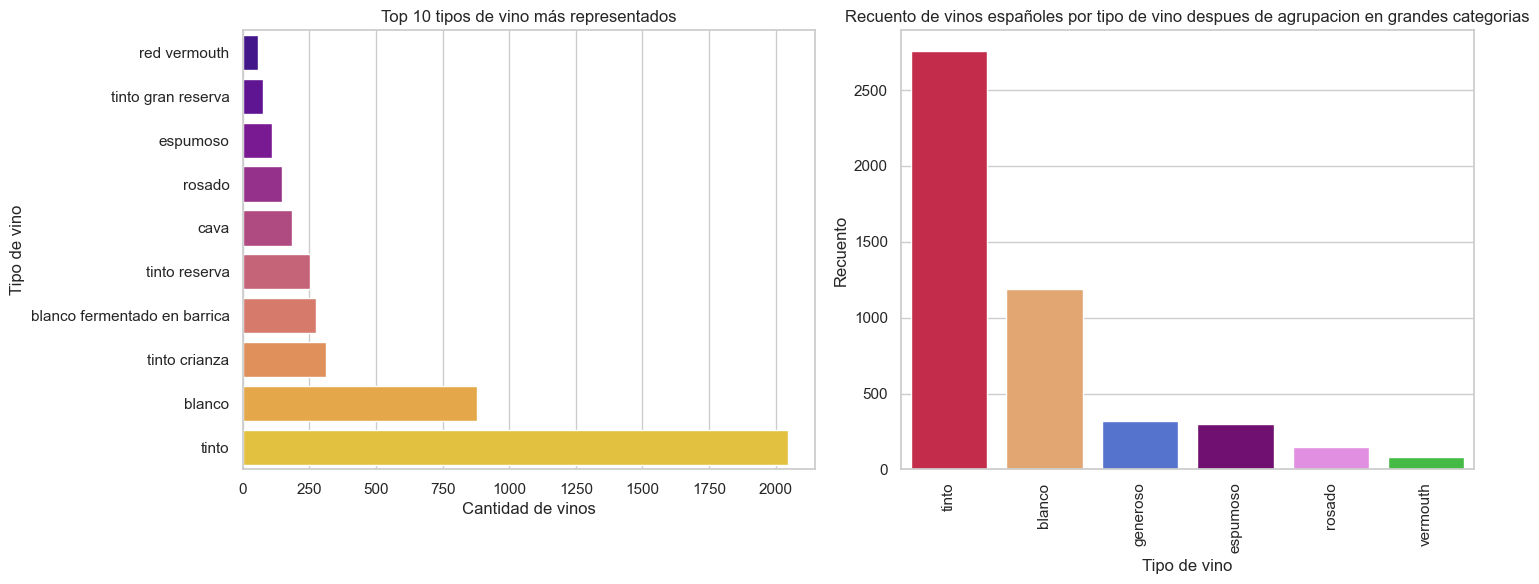

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el mapeo de colores para los tipos de vino
color_map = {
    'tinto': 'crimson',
    'blanco': 'sandybrown',
    'espumoso': 'royalblue',
    'generoso': 'purple',
    'rosado': 'violet', 
    'vermouth': 'limegreen'
}

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Filtrar los 10 tipos de vino con más vinos en el dataframe y graficar en el primer subplot
top_tipo = data.groupby('tipo').count().sort_values('cata').tail(10)
sns.barplot(x='cata', y=top_tipo.index, data=top_tipo, palette='plasma', ax=axs[0])
axs[0].set_xlabel("Cantidad de vinos")
axs[0].set_ylabel("Tipo de vino")
axs[0].set_title("Top 10 tipos de vino más representados")

# Graficar el recuento de precios por rango con colores personalizados en el segundo subplot
sns.countplot(x=data.tipo2, order=tipo_count_sorted.index, palette=color_map.values(), ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Tipo de vino')
axs[1].set_ylabel('Recuento')
axs[1].set_title('Recuento de vinos españoles por tipo de vino despues de agrupacion en grandes categorias')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Guardar el plot como jpg
plt.savefig('tipos_vino.jpg')

# Mostrar la figura con los subplots
plt.show()


In [42]:
data.tipo.unique()

array(['tinto', 'red vermouth', 'blanco', 'espumoso', 'amontillado',
       'oloroso', 'tinto reserva', 'blanco fermentado en barrica',
       'white vermouth', 'manzanilla', 'dulce px', 'palo cortado',
       'palo cortado vors', 'fino', 'rosado', 'otro(s)', 'tinto joven',
       'tinto crianza', 'amontillado vors', 'oloroso vors',
       'aromatised wine', 'blanco naturalmente dulce', 'tinto dulce',
       'blanco dulce', 'orange wine', 'tinto gran reserva', 'cava',
       'sweet moscatel', 'oloroso dulce', 'dulce px vors', 'frizzante',
       'dulce', 'rancio', 'rueda dorado'], dtype=object)

In [40]:
data["tipo"].value_counts()

tipo
tinto                           2047
blanco                           878
tinto crianza                    314
blanco fermentado en barrica     276
tinto reserva                    254
cava                             185
rosado                           148
espumoso                         110
tinto gran reserva                76
red vermouth                      59
tinto joven                       52
fino                              51
manzanilla                        44
amontillado                       42
oloroso                           41
dulce px                          26
blanco dulce                      23
white vermouth                    22
palo cortado                      21
otro(s)                           21
sweet moscatel                    18
blanco naturalmente dulce         14
tinto dulce                       13
oloroso dulce                     12
orange wine                       12
oloroso vors                      10
amontillado vors                 

In [64]:
# vamos a ver el top 20 de las variedades de uvas del dataset
data["variedad2"].value_counts().head(20)

variedad2
 tempranillo               586
 garnacha                  299
 palomino fino             185
 albariño                  149
 verdejo                   148
 mencia                    124
 monastrell                 98
 tinta de toro              86
 tinta del pais             84
 pedro ximenez              76
 tinto fino                 66
 viura                      66
 godello                    63
 chardonnay                 63
 tempranillo,  graciano     60
 sauvignon blanc            46
 syrah                      44
 garnacha blanca            41
 palomino                   40
 moscatel de alejandria     38
Name: count, dtype: int64

In [66]:
# vamos a ver el top 5 de las variedades de uvas del dataset
data["clima"].value_counts().head(5)

clima
continental.                                             1290
atlantico.                                                538
mediterraneo.                                             428
atlantico                                                 143
privilegiado con influencia atlantica y mediterranea.     113
Name: count, dtype: int64

##### c. tipo2 - Tipos de vino agrupados en categorias superiores

In [52]:
data["tipo2"].unique()

array(['tinto', 'vermouth', 'blanco', 'espumoso', 'generoso', 'rosado'],
      dtype=object)

In [54]:
data["tipo2"].value_counts()

tipo2
tinto       2756
blanco      1190
generoso     318
espumoso     299
rosado       148
vermouth      81
Name: count, dtype: int64

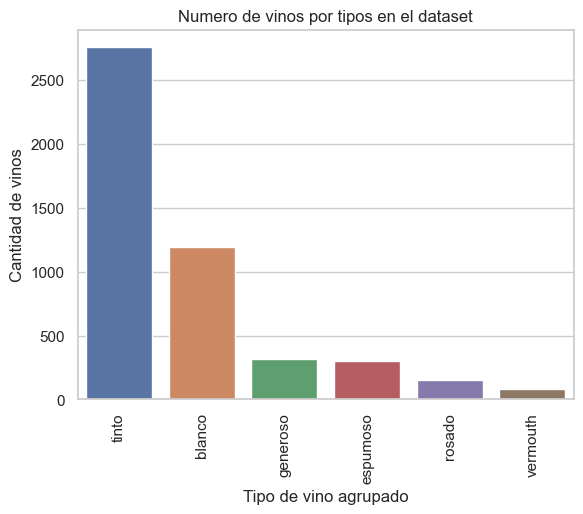

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que `data` es tu DataFrame y `tipo2` es la columna que quieres graficar

# Calcular el conteo de cada categoría en tipo2
counts = data['tipo2'].value_counts()

# Obtener el orden de las categorías de mayor a menor conteo
order = counts.index

# Crear el countplot con el orden especificado
sns.countplot(x='tipo2', data=data, order=order)

# Rotar las etiquetas del eje x en 90 grados
plt.xticks(rotation=90)

# Agregar etiquetas y título
plt.xlabel("Tipo de vino agrupado")
plt.ylabel("Cantidad de vinos")
plt.title("Numero de vinos por tipos en el dataset")

# Mostrar el gráfico
plt.show()


##### d. variedades de uva

In [70]:
data["variedad2"].value_counts().head(40)

variedad2
 tempranillo                         586
 garnacha                            299
 palomino fino                       185
 albariño                            149
 verdejo                             148
 mencia                              124
 monastrell                           98
 tinta de toro                        86
 tinta del pais                       84
 pedro ximenez                        76
 tinto fino                           66
 viura                                66
 godello                              63
 chardonnay                           63
 tempranillo,  graciano               60
 sauvignon blanc                      46
 syrah                                44
 garnacha blanca                      41
 palomino                             40
 moscatel de alejandria               38
 tempranillo,  garnacha               37
 pinot noir                           36
 graciano                             35
 bobal                                31
 xarel

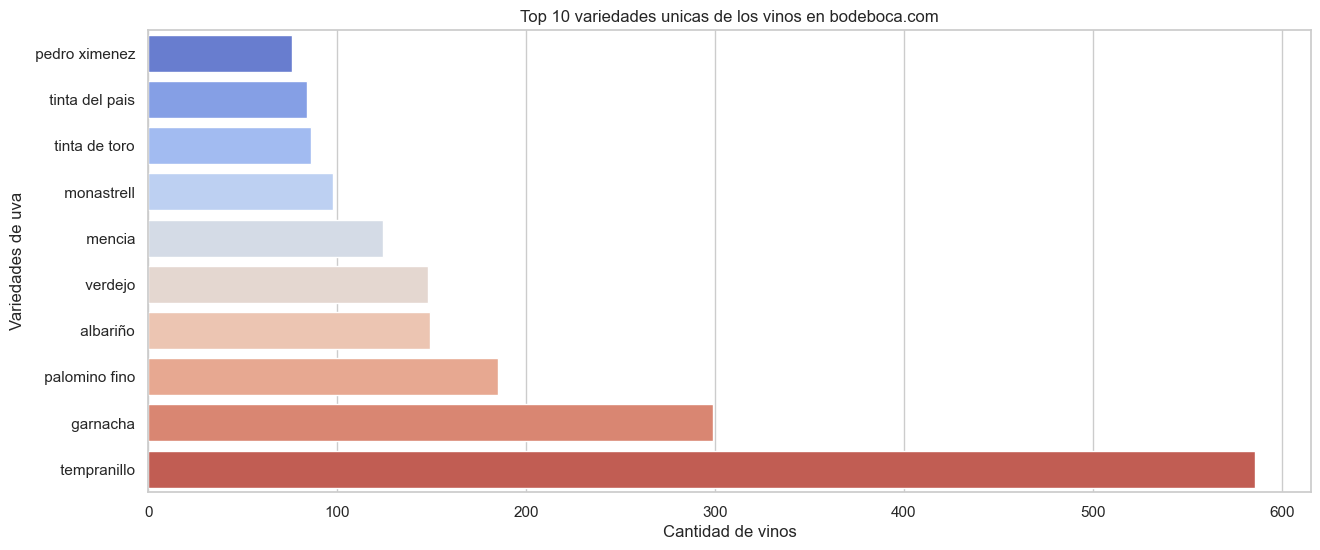

In [75]:
# Filtrar las 10 bodegas con más vinos
top_var = data.groupby('variedad2').count().sort_values('cata').tail(10)

# Crear el countplot con Seaborn en horizontal
plt.figure(figsize=(15, 6))  # Ajustar el tamaño de la figura si es necesario
sns.barplot(y=top_var.index, x='cata', data=top_var, palette='coolwarm')


# Agregar etiquetas y título
plt.xlabel("Cantidad de vinos")
plt.ylabel("Variedades de uva")
plt.title("Top 10 variedades unicas de los vinos en bodeboca.com")

# Guardar el plot como jpg
plt.savefig('variedades.jpg')

# Mostrar el gráfico
plt.show()

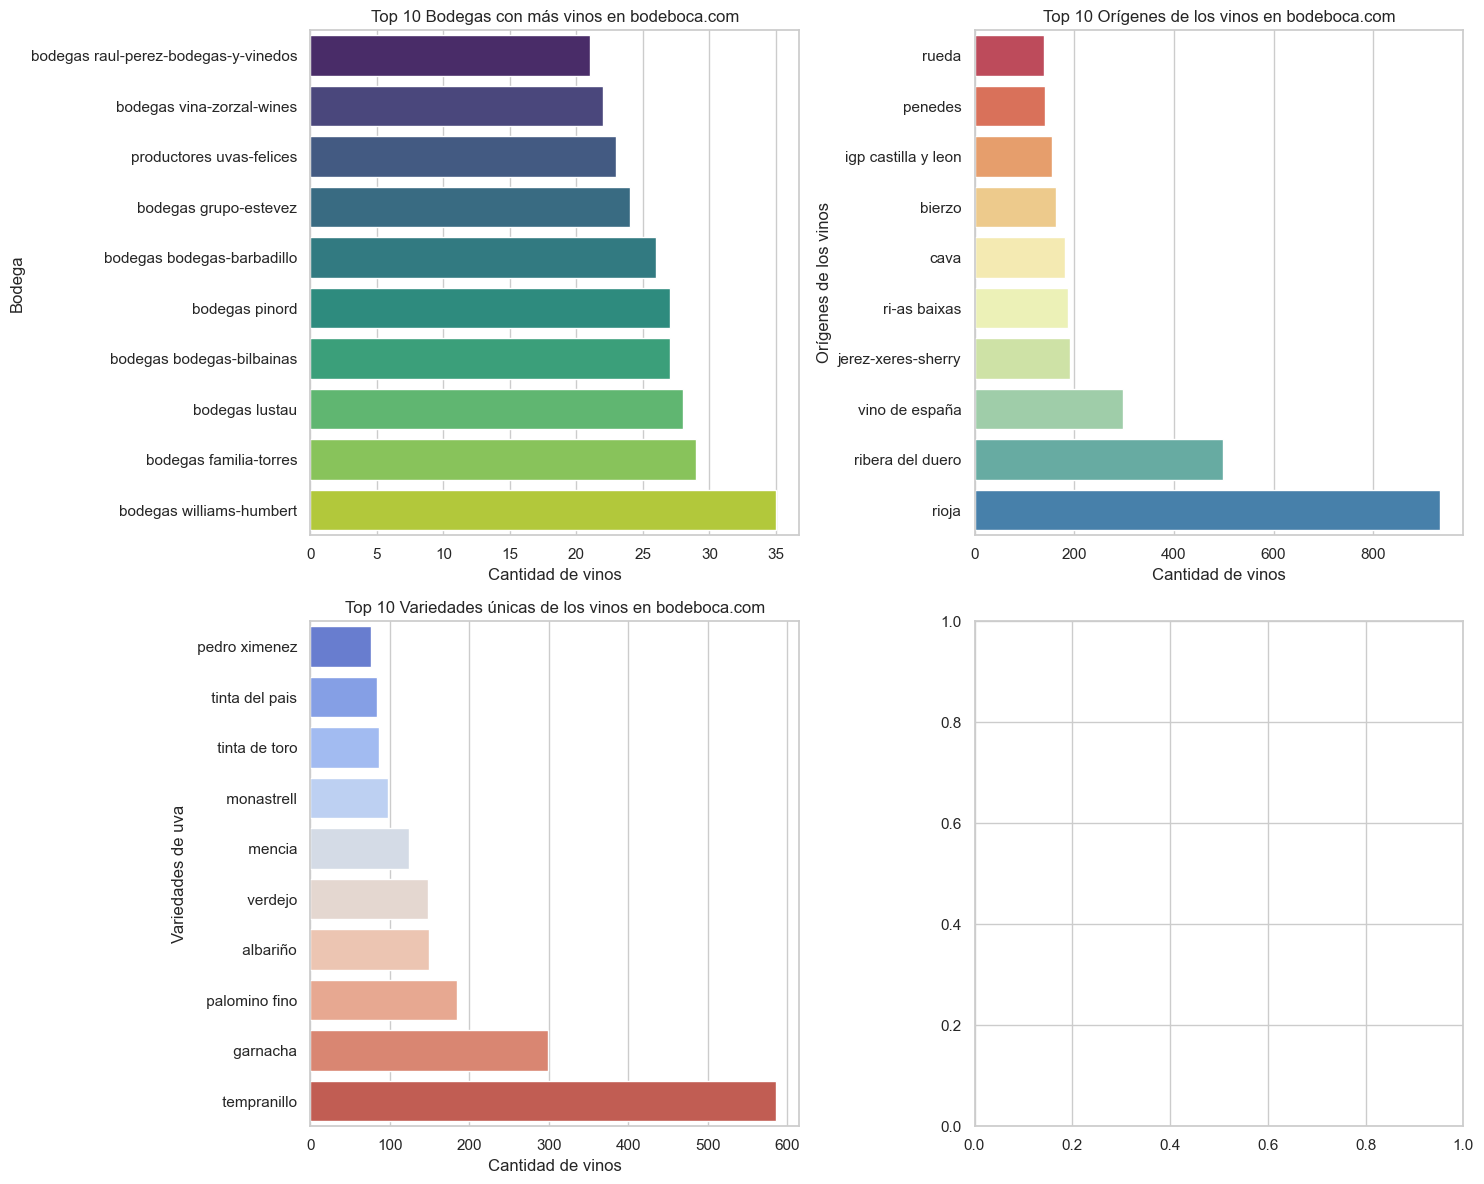

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las 10 bodegas con más vinos
top_bodegas = data.groupby('bodega').count().sort_values('cata').tail(10)

# Filtrar los 10 origenes con más vinos
top_origen = data.groupby('origen').count().sort_values('cata').tail(10)

# Filtrar las 10 variedades únicas con más vinos
top_var = data.groupby('variedad2').count().sort_values('cata').tail(10)

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Graficar el primer subplot (bodegas)
sns.barplot(y=top_bodegas.index, x='cata', data=top_bodegas, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_ylabel("Bodega")
axs[0, 0].set_xlabel("Cantidad de vinos")
axs[0, 0].set_title("Top 10 Bodegas con más vinos en bodeboca.com")

# Graficar el segundo subplot (orígenes)
sns.barplot(y=top_origen.index, x='cata', data=top_origen, palette='Spectral', ax=axs[0, 1])
axs[0, 1].set_ylabel("Orígenes de los vinos")
axs[0, 1].set_xlabel("Cantidad de vinos")
axs[0, 1].set_title("Top 10 Orígenes de los vinos en bodeboca.com")

# Graficar el tercer subplot (variedades de uva)
sns.barplot(y=top_var.index.tolist(), x='cata', data=top_var, palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_ylabel("Variedades de uva")
axs[1, 0].set_xlabel("Cantidad de vinos")
axs[1, 0].set_title("Top 10 Variedades únicas de los vinos en bodeboca.com")

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Guardar el plot como jpg
plt.savefig('bodegas_origenes_variedades.jpg')

# Mostrar la figura con los subplots
plt.show()


## 3. Conclusiones y Notas del EDA

* La mayor parte de los vinos se encuentran entre 0 y 50 euros, con una media de 33.80 euros. Los precios mínimo y máximo son 4,45 y 2800 euros. Las valoraciones o ratings de los vinos se centran en torno a 4.0 en puntuación y el grado alcohólico en torno a 12°. 

* Los tipos de vinos (Figs. 2) obtenidos de bodeboca proporcionaban 33 categorías de tipo de vino ('tinto', 'red vermouth', 'blanco', 'espumoso', 'amontillado', 'oloroso', 'tinto reserva', 'blanco fermentado en barrica', 'white vermouth', 'manzanilla', 'dulce px', 'palo cortado', 'palo cortado vors', 'fino', 'rosado', 'otro(s)', 'tinto joven', 'tinto crianza', 'amontillado vors', 'oloroso vors', 'aromatised wine', 'blanco naturalmente dulce', 'tinto dulce', 'blanco dulce', 'orange wine', 'tinto gran reserva', 'cava', 'sweet moscatel', 'oloroso dulce', 'dulce px vors', 'frizzante', 'dulce', 'rancio', 'rueda dorado'). Con esto, creamos una nueva columna `tipo2` donde reagrupamos los vinos en grupos mas generales, y pasamos de 33 categorias a 6: tinto, blanco, generoso, espumoso, rosado y vermouth. La categoria de vinos generosos es una amalgama de vinos dulces, manzanilla, fino, olorosos, aromatizados, palo cortado, vinos rancios…etc. Aquí priorizamos los vinos con alta graduacion alcoholica, basandonos en la recomendación de una experta enologa (Marta Benito Reyes). Los espumosos engloban los vinos frizzante, espumosos y cavas. 


* Las columnas con información sobre bodegas y las denominaciones de origen de los vinos son categóricas con un alto número de variables únicas. En el caso de las bodegas, nuestro dataset tiene 896 bodegas, donde las bodegas Williams-Humbert y Landau de Jerez, familia Torres (Rias Baixas), y Bodegas Bilbainas (Rioja) son las que poseen el mayor número de vinos en nuestro dataset. Los vinos con mayor representación en nuestros datos son los de Rioja y Ribera de Duero.

* Finalmente, la columna con información sobre variedades de uva contiene información compleja ya que muestra la variedad o variedades de uva del vino en porcentajes. Para mayor funcionalidad en el análisis, hemos eliminado tanto los números como los porcentajes de la columna, para evaluar solo el texto de la columna. En el ultimo grafico, podemos ver las variedades puras, es decir, vinos con un 100% de esa variedad de uva, con mayor representación en nuestros datos. Como vemos, los vinos con variedades 100% tempranillo, garnacha, palomino fino y albarino son las más representadas.